# **Name: Jessica Omuna Anabor**

# **Code Explanation**

Before we fully commence, we need to first import the necessary tools to implement this project

In [11]:
!pip install -U classiq
import classiq
classiq.authenticate()

Your user code: FLRK-RLKQ
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=FLRK-RLKQ


In [12]:

from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences

# **Code Explanation**

The number of qubits needed to represent the vertices is known as `size`. For this scenario, size is set to 4, meaning that 4 qubits are necessary.
The total number of nodes is determined by the variable `num_nodes`, which is based on the size of the qubits. It calculates the total nodes using the formula `2**size`. With size set at 4, there will be a total of 16 nodes.

In [13]:
size = 4
num_nodes = 2**size

# **Quantum Walk**

Here, we will go into the process of incorporating a quantum walk in Python using the Qiskit library. A quantum walk mimics a classical random walk in a quantum setting, involving the movement of a particle across a graph or lattice. This concept finds utility in diverse domains such as quantum algorithms and simulations.

The code below shows how to execute a quantum walk in Python with the assistance of the Qiskit library.

In [18]:
# Preparing a qubit in the |-> state
@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

@qfunc
def diffuser_oracle(aux: Output[QNum], x: QNum):
    aux ^= (x != 0)

@qfunc
def zero_diffuser(x: QNum):
    aux = QNum('aux')
    allocate(1, aux)
    within_apply(compute=lambda: prepare_minus(aux),
                 action=lambda: diffuser_oracle)

def C_iteration(i: int, vertices: QNum, adjacent_vertices: QNum):
    prob = [0] * num_nodes
    if i == 0:
        prob[i + 1] = 1.0
    elif i == num_nodes - 1:
        prob[i - 1] = 1.0
    else:
        prob[i - 1] = 0.5
        prob[i + 1] = 0.5

    print(f'Node={i}, prob vec ={prob}')

    control(ctrl=vertices == i,
            operand=lambda: within_apply(
                compute=lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
                action=lambda: zero_diffuser(adjacent_vertices)))



In [ ]:
@qfunc
def C_operator(vertices: QNum, adjacent_vertices: QNum):
    for i in range(num_nodes):
        C_iteration(i, vertices, adjacent_vertices)

**Code Explanation**

The code consists of three quantum functions: `edge_oracle`, `bitwise_swap`, and `S_operator`.

`edge_oracle` requires three parameters:` res (an Output QBit`), `vertices`, and `adjacent_vertices.` It executes a bitwise OR operation on the result (res) by verifying if the difference between` vertices` and `adjacent_vertices` is either 1 or -1.

`bitwise_swap` exchanges corresponding QBits between arrays `x` and `y` by uses the `SWAP` function within a repeat loop.

`S_operator` initializes a QNum variable res, invokes `edge_oracle` with `vertices `and `adjacent_vertices`, and then conditionally invokes `bitwise_swap` depending on the outcome of the `edge_oracle` using a control block.

In [19]:
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1))

@qfunc
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    repeat(count= x.len,
           iteration= lambda i: SWAP(x[i],y[i]))

@qfunc
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

# **Code Explanation**

 The code establishes a Python function called main which accepts two QNum type parameters: `vertices` and `adjacent_vertices`. Within the function, it reserves memory, performs a` Hadamard` transform on the vertices, reserves memory for adjacent_vertices, and subsequently applies C_operator and `S_operator` on the vertices and adjacent_vertices correspondingly.

In [20]:
@qfunc
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

    allocate(size, vertices)
    hadamard_transform(vertices)
    allocate(size, adjacent_vertices)

    C_operator(vertices, adjacent_vertices)
    S_operator(vertices, adjacent_vertices)

# **Code Explanation**

The `create_model` function is used to generate a quantum model with the main argument. After that, the `synthesize` function is applied to synthesize the model, and the resulting quantum program is saved in the` qprog `variable. Lastly, the `show` function is used to display the quantum program

In [21]:
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

**A Diagram of the Ciruit**

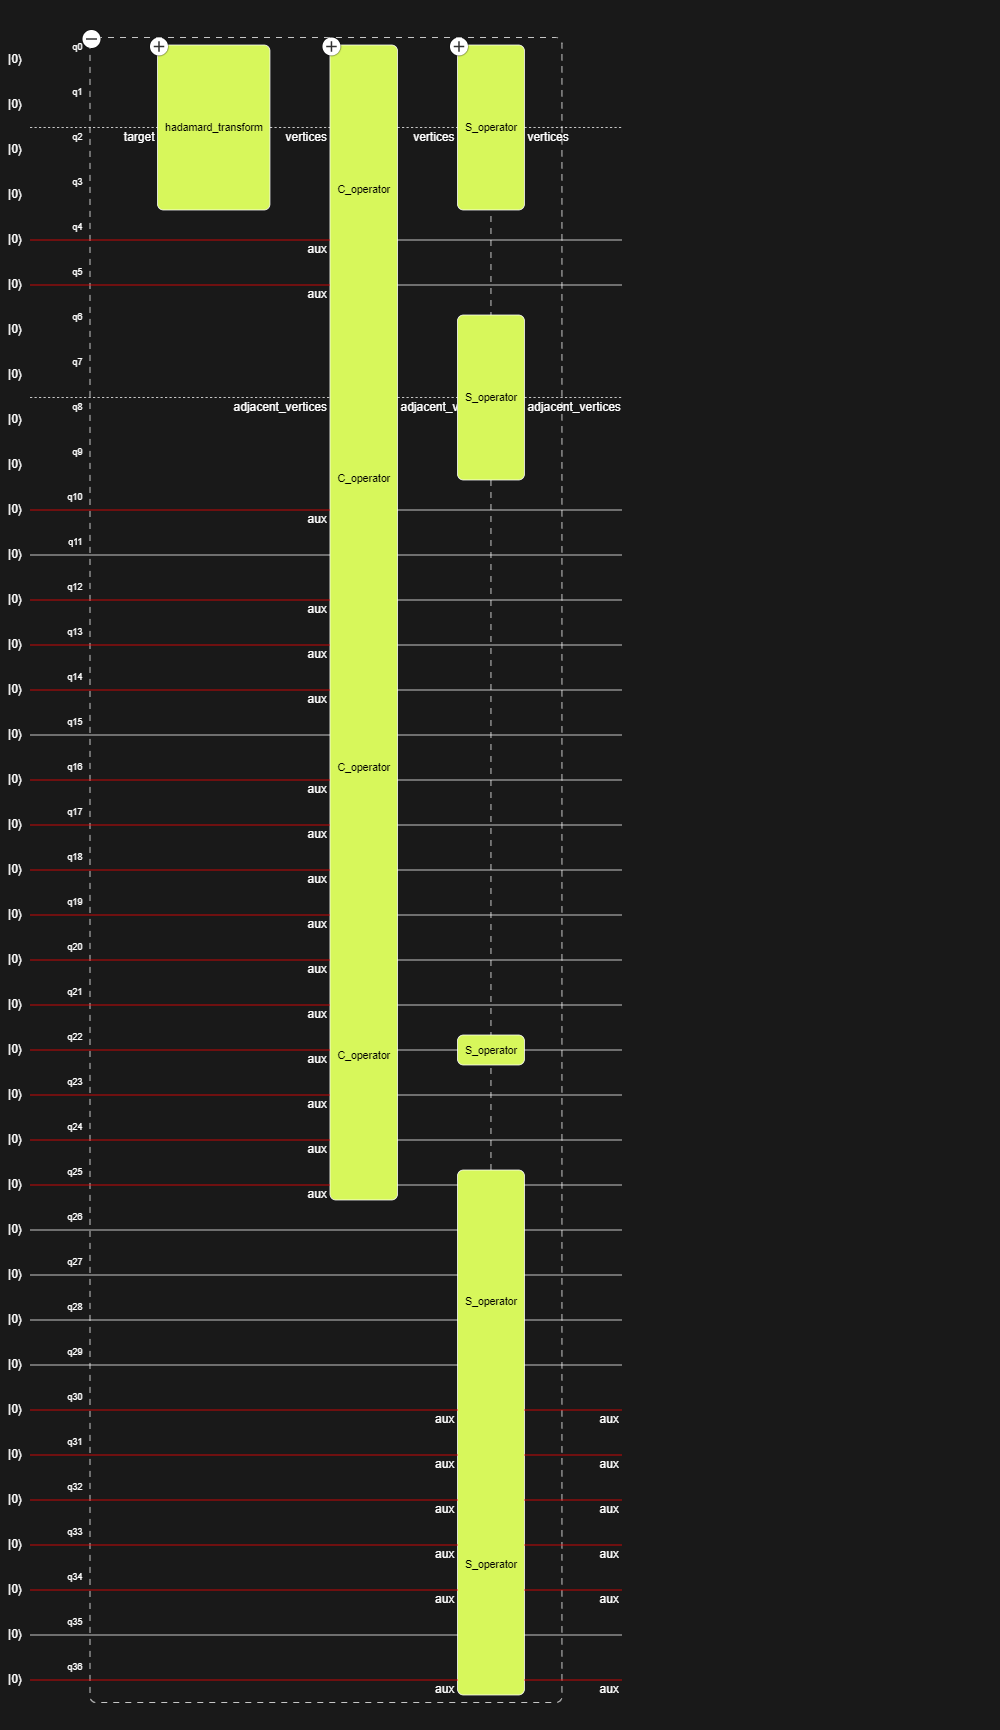

**Half of the Zoomed Out Circuit**

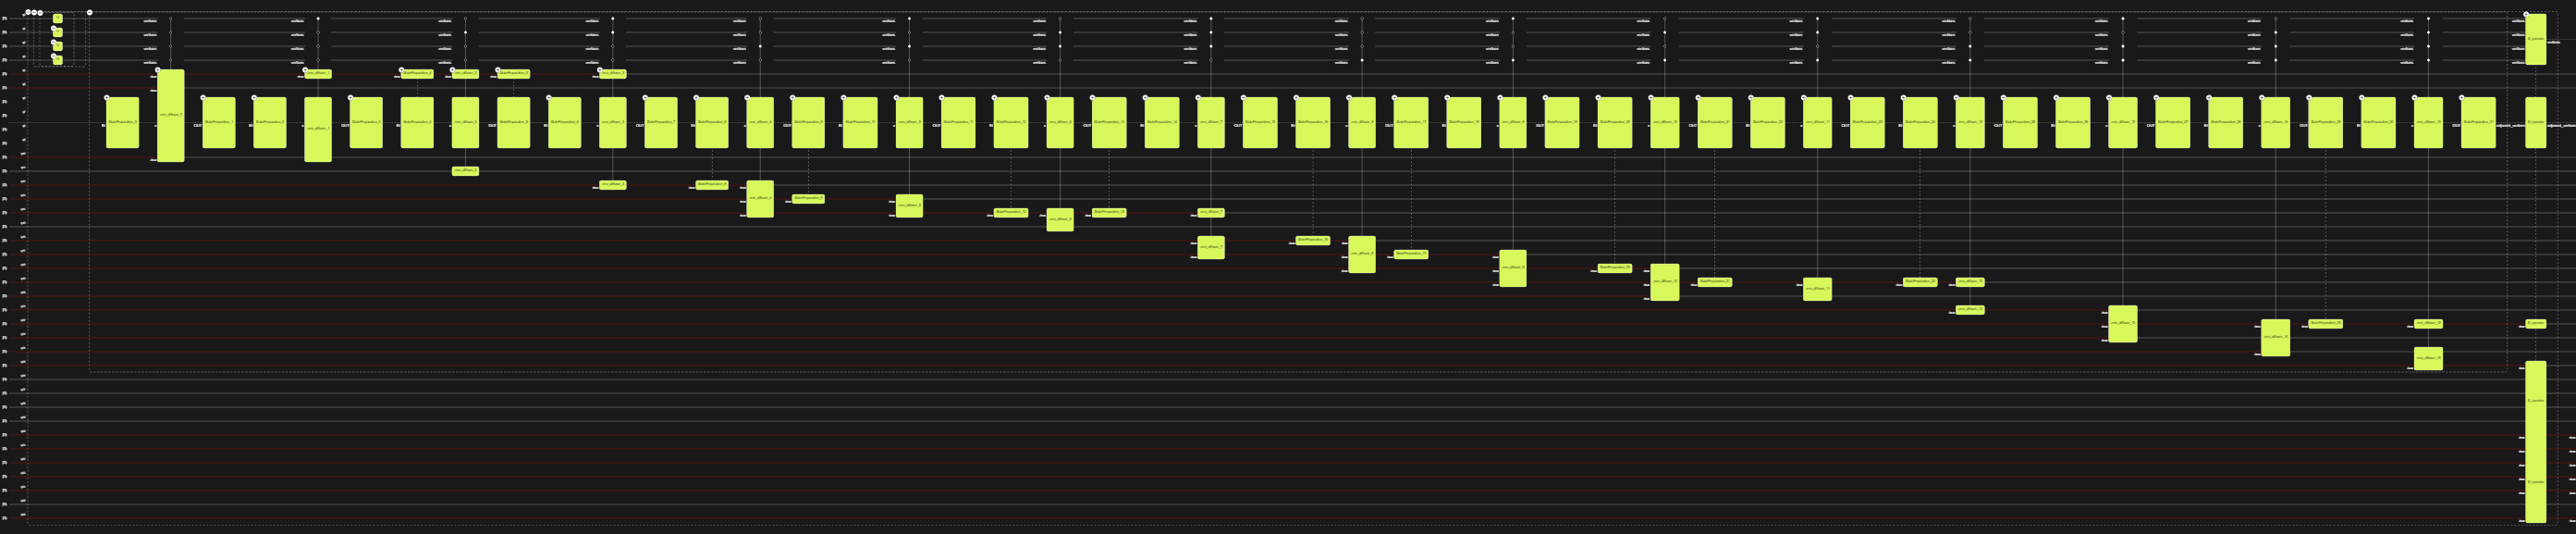